In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./Heart.csv")
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


<AxesSubplot:xlabel='AHD', ylabel='count'>

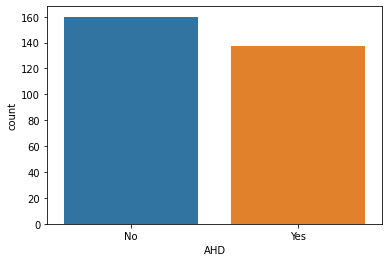

In [3]:
df.dropna(inplace=True)

sns.countplot(data = df, x = "AHD")

In [4]:
from sklearn.model_selection import train_test_split
df_dummies = pd.get_dummies(df, drop_first = True)
X,y = df_dummies.drop("AHD_Yes", axis =1), df_dummies["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((237, 17), (60, 17))

In [5]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=uint8)

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
"n_estimator": [50, 100,150,200,300], 
"criterion": ["gini", "entropy"],
"max_features": ["auto", "sqrt", "log2"],
}

clf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=4,verbose=1, scoring="recall")
clf.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


ValueError: Invalid parameter n_estimator for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
clf.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_tuned = clf.predict(X_test)

print(classification_report(y_test, y_pred_tuned))
cm=confusion_matrix(y_test, y_pred_tuned)
ConfusionMatrixDisplay(cm, display_labels=["No","Yes"]).plot()

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
model_rf.feature_importances_, model_rf.feature_importances_.sum()

(array([0.07091175, 0.09286085, 0.0238232 , 0.07441086, 0.07611548,
        0.00993111, 0.01736448, 0.10464214, 0.05143018, 0.10833426,
        0.0236672 , 0.13477701, 0.03673824, 0.00960644, 0.01464272,
        0.07833063, 0.07241344]),
 1.0000000000000002)

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

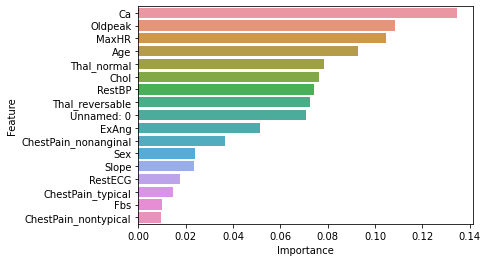

In [ ]:
feature_importance = pd.DataFrame([X.columns, model_rf.feature_importances_]).T
feature_importance.columns=["Feature", "Importance"]
feature_importance.sort_values(by="Importance", ascending = False, inplace = True)
sns.barplot(data= feature_importance, y = "Feature", x = "Importance")